In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
def plot_data_frame(df):
    x = df.index
    y = df.T.values
    for column, label in zip(y, df.columns):
        plt.plot(x, column, label=label)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.legend()
    plt.show()

In [6]:
def chebyshev(ex, std, prob):
    n = np.sqrt(1/prob)
    low = ex - n * std
    high = ex + n * std
    return low, high

In [26]:
def add_chebyshev_low(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.05)
    return cheb_low

def add_chebyshev_high(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.05)
    return cheb_high

def harmonic(n):
    return sum([1 / (i+1) for i in range(n)])

In [8]:
df = pd.read_csv("result.csv"); df

,N,static_points,cycles,records
0,100,1,5,5
1,100,0,8,5
2,100,2,3,4
3,100,0,3,8
4,100,2,9,3
...,...,...,...,...
99995,10000,1,12,13
99996,10000,0,10,10
99997,10000,2,13,6
99998,10000,1,6,14


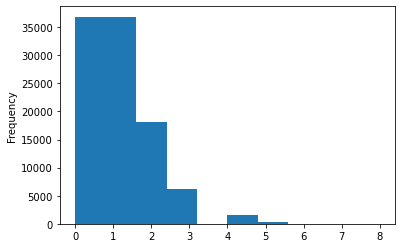

In [38]:
df["static_points"].plot.hist()

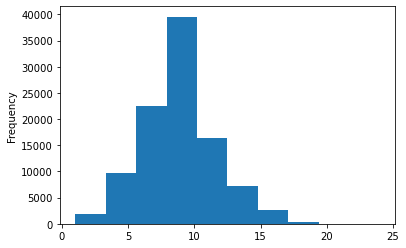

In [37]:
df["cycles"].plot.hist()

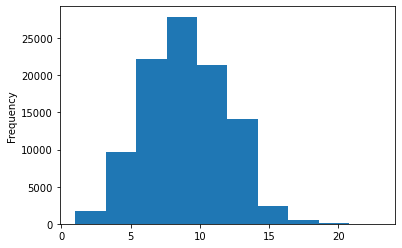

In [39]:
df["records"].plot.hist()

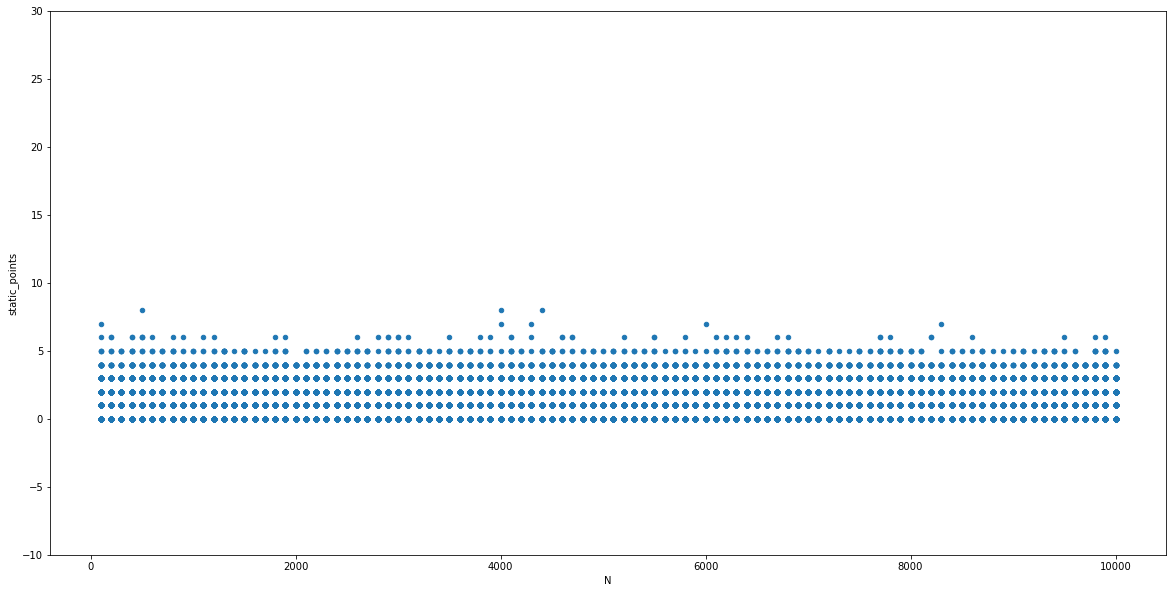

In [9]:
df.plot.scatter(x="N", y="static_points", figsize=(20, 10), ylim=(-10, 30))

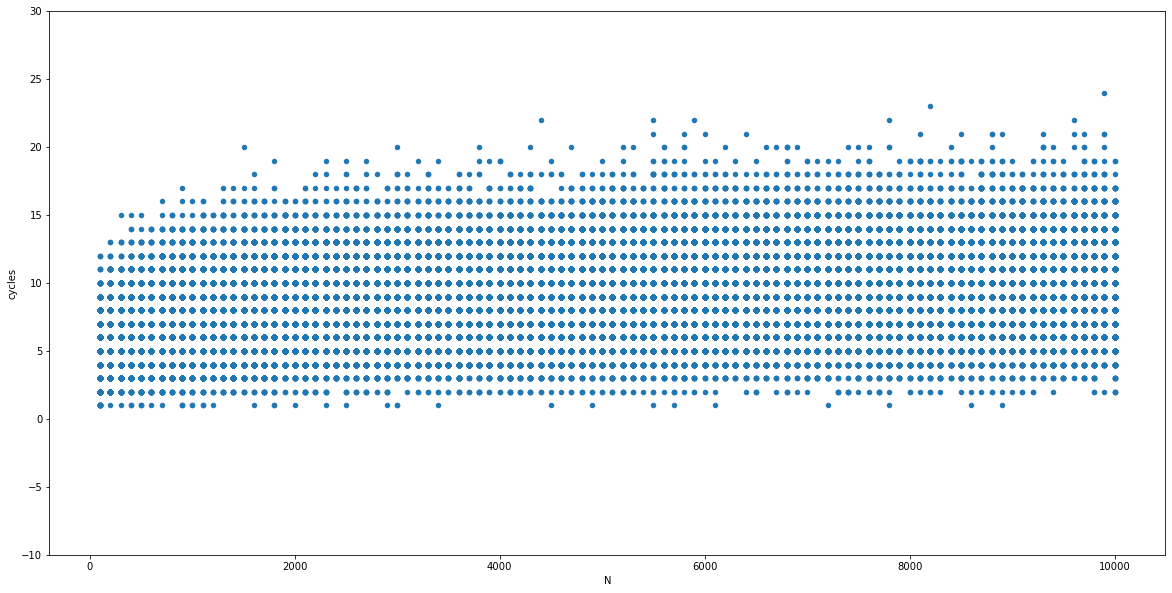

In [10]:
df.plot.scatter(x="N", y="cycles", figsize=(20, 10), ylim=(-10, 30))

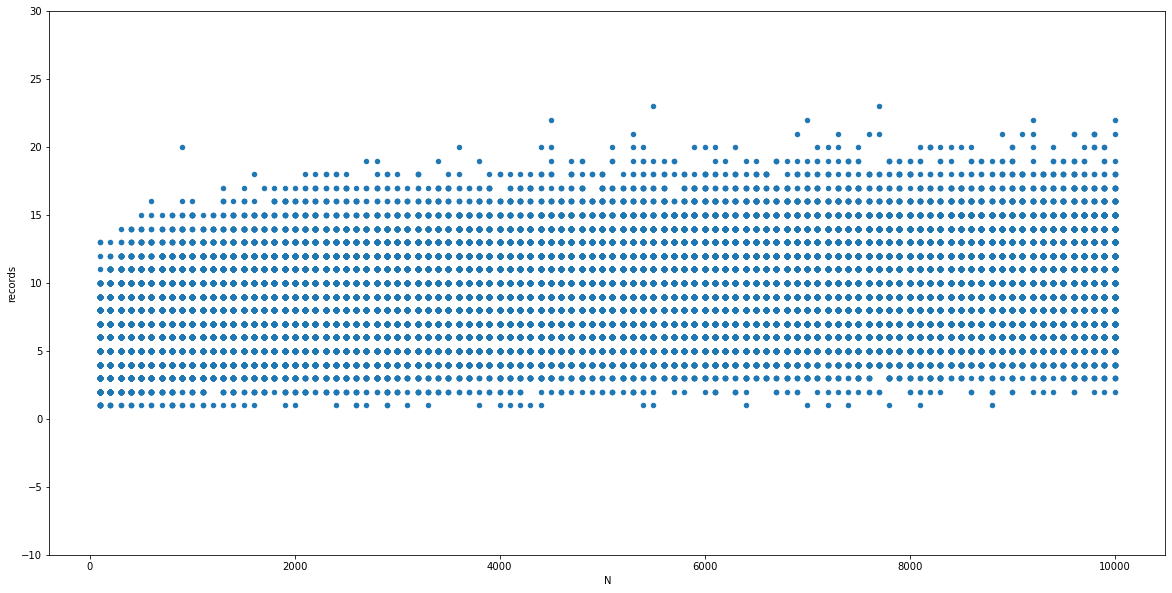

In [11]:
df.plot.scatter(x="N", y="records", figsize=(20, 10), ylim=(-10, 30))

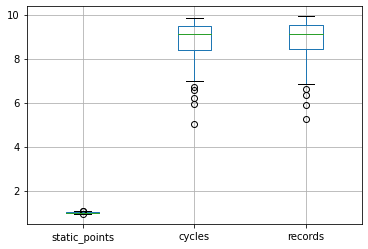

In [12]:
grouped = df.groupby("N")
grouped.mean().boxplot()

# Liczba punktów stałych
Niech $X_i = 1$ jeżeli $i$ jest punktem stałym, oraz niech $X_i = 0$ w p.p.
Wtedy liczba $Y$ punktów stałych jest dana sumą $$Y = X_1 + X_2 + ... + X_n$$.
Z liniowości wartości oczekiwanej mamy $$E(Y) = E(X_1 + X_2 + ... + X_n) = E(X_1) + ... + E(X_n)$$.
Prawdopodobieństwo że $X_i = 1$ jest równe $\frac{1}{n}$. Mamy zatem że $$E(Y) = n \cdot \frac{1}{n} = 1$$.

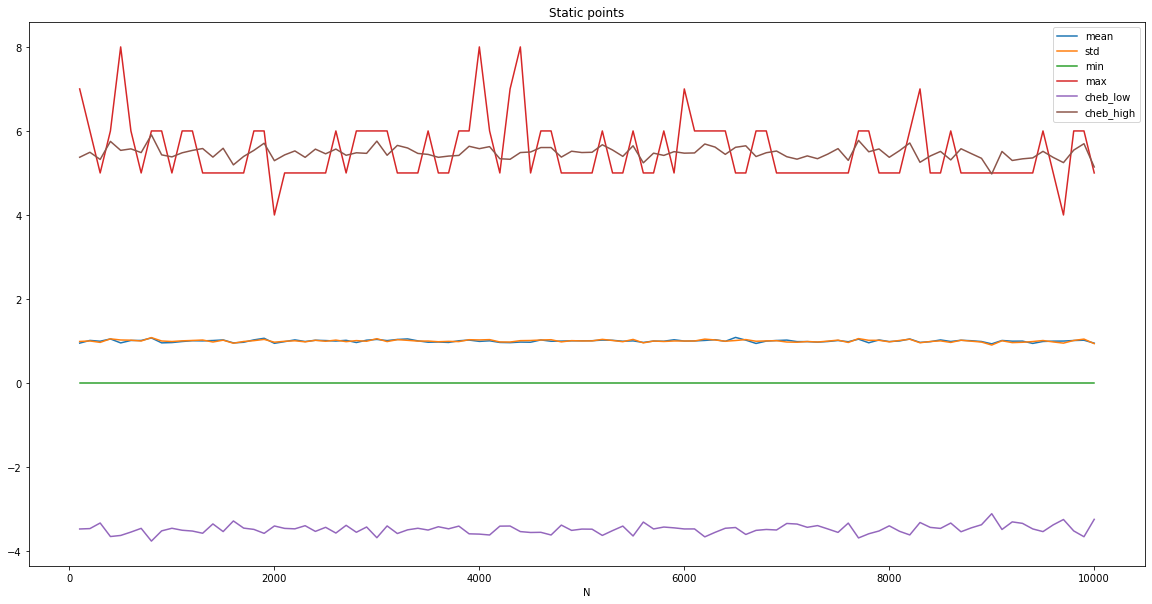

In [13]:
described = grouped["static_points"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.plot(title="Static points", figsize=(20,10))

# Liczba cykli
$$\mu_n = H_n = 1 + \frac{1}{2} + ... + \frac{1}{n}$$

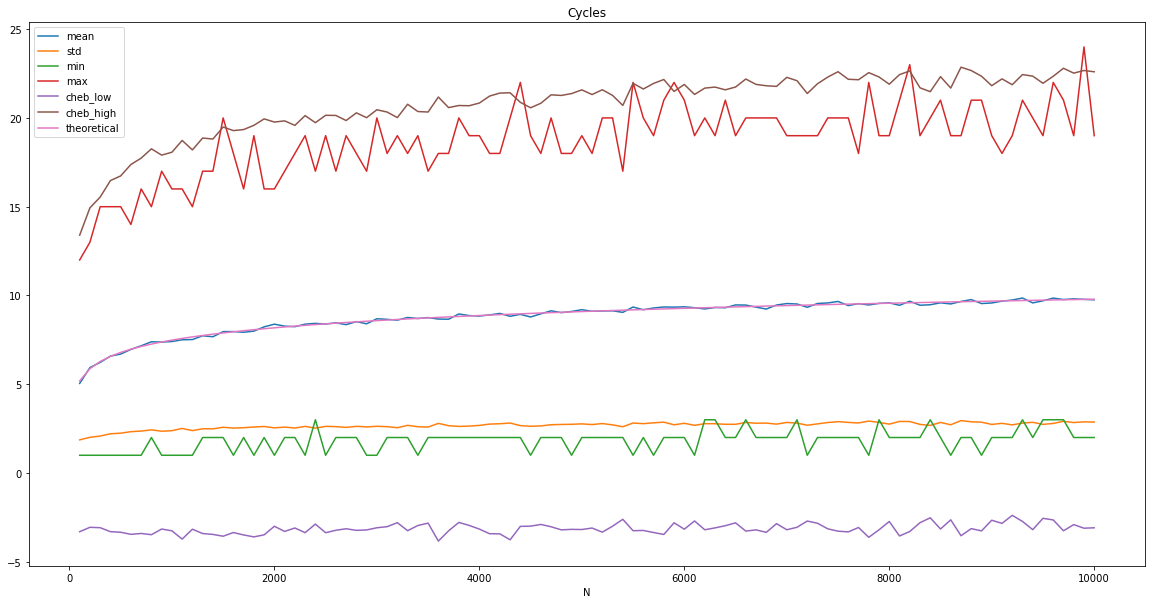

In [27]:
described = grouped["cycles"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described["theoretical"] = described.apply(lambda row: harmonic(int(row.name)), axis=1)
described.plot(title="Cycles", figsize=(20,10))

# Liczba rekordów

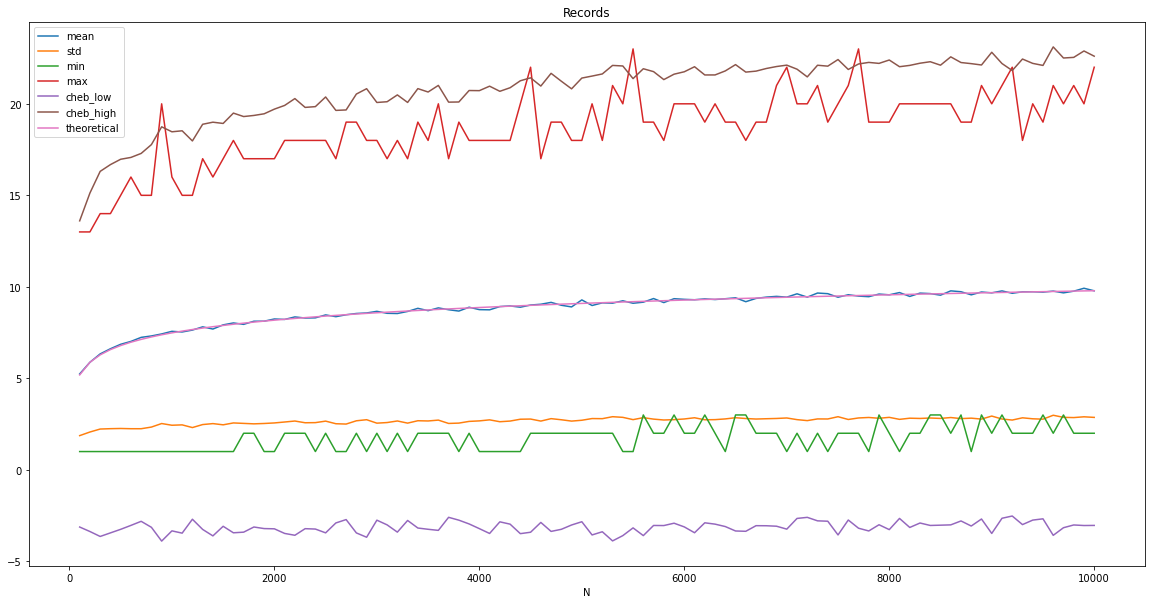

In [28]:
described = grouped["records"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described["theoretical"] = described.apply(lambda row: harmonic(int(row.name)), axis=1)
described.plot(title="Records", figsize=(20,10))